#Projeto Churn (em andamento)

O projeto de ciência de dados foi uma resolução do Segundo Challenge de Dados da Alura aonde foram disponibilizados dados de uma empresa real chamada Novexus.

#Limpeza e Processamento dos dados 🧹

 **Dicionário de dados**

* `customerID`: Número de identificação único de cada cliente
* `Churn`: Se o cliente deixou ou Não a empresa
* `gender`: Gênero (masculino e feminino)
* `SeniorCitizen`: Informação sobre um cliente ter ou nÃo ter idade igual ou maior que 65 anos
* `Partner`:  Se o cliente possui ou nÃo um parceiro ou parceira
* `Dependents`: Se o cliente possui ou nÃo dependentes
* `tenure`:  Meses de contrato do cliente
* `PhoneService`: Assinatura de serviço telefônico
* `MultipleLines`: Assisnatura de mais de uma linha de telefone
* `InternetService`: Assinatura de um provedor internet
* `OnlineSecurity`: Assinatura adicional de segurançaa online
* `OnlineBackup`: Assinatura adicional de backup online
* `DeviceProtection`: Assinatura adicional de proteção no dispositivo
* `TechSupport`: Assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: Assinatura de TV a cabo
* `StreamingMovies`: Assinatura de streaming de filmes
* `Contract`: Tipo de contrato
* `PaperlessBilling`: Se o cliente prefere receber online a fatura
* `PaymentMethod`: Forma de pagamento
* `Charges.Monthly`: Total de todos os serviÃ§os do cliente por mÃªs
* `Charges.Total`: Total gasto pelo cliente

##Importando as bibliotecas 📚


In [141]:
import pandas as pd
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import warnings




In [142]:
#lendo o conjunto de dados
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [143]:
dados.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Pode-se observar acima que as colunas customer, phone,internet e account são tipo JSON para analisar essas colunas é necessário utilizarmos o comando abaixo
 nas colunas customer, phone, internet e acount para descompactar as colunas e conseguir visualizá-las.                                                            




In [144]:
#descompactando as colunas do tipo json
customer_descompac = pd.json_normalize(dados['customer'])
phone_descompac = json_normalize(dados['phone'])
internet_descompac = json_normalize(dados['internet'])
account_descompac = json_normalize(dados['account'])


<ipython-input-144-a3e052ec113f>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  phone_descompac = json_normalize(dados['phone'])
<ipython-input-144-a3e052ec113f>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  internet_descompac = json_normalize(dados['internet'])
<ipython-input-144-a3e052ec113f>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  account_descompac = json_normalize(dados['account'])


In [145]:
#exemplo  de aplicação em uma coluna da função json_normalize
customer_descompac

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [146]:
# concatenandos os dados em um data frame único
churn = dados['Churn']
dados = pd.concat ([customer_descompac, phone_descompac, internet_descompac, account_descompac, churn], axis=1)
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [71]:
print('No conjunto de dados temos', dados.shape, 'linhas e colunas')

No conjunto de dados temos (7267, 20) linhas e colunas


A função describe nos fornece estatísticas sobre as colunas numéricas

In [147]:
dados.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [148]:
dados.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn               0
dtype: int64

In [149]:
#verificando os valores únicos das colunas
for var in dados:
  print('Coluna', var, 'Tipo da coluna', dados[var].dtype)
  print('Valores únicos:', dados[var].unique(), '\n')

Coluna gender Tipo da coluna object
Valores únicos: ['Female' 'Male'] 

Coluna SeniorCitizen Tipo da coluna int64
Valores únicos: [0 1] 

Coluna Partner Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna Dependents Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna tenure Tipo da coluna int64
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] 

Coluna PhoneService Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna MultipleLines Tipo da coluna object
Valores únicos: ['No' 'Yes' 'No phone service'] 

Coluna InternetService Tipo da coluna object
Valores únicos: ['DSL' 'Fiber optic' 'No'] 

Coluna OnlineSecurity Tipo da coluna object
Valores únicos: ['No' 'Yes' 'No internet service'] 

Coluna OnlineBackup Tipo da coluna object
Valores únicos: ['Yes' 'No' 'No internet service'] 

#Verificação dos tipos de variáveis

In [150]:
#observando os tipos de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


Pode-se observar que a coluna charges.total é do tipo float. Após a tentativa de aplicar a função astype foi detectado na coluna que existiam espaço em branco como observado abaixo

In [151]:
dados[dados['Charges.Total'] ==' '].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
975,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
1775,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
1955,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
2075,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
2232,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


In [77]:
dados.shape

(7267, 20)

In [152]:
#trocando os espaços em branco por NaN nas colunas charges.total e churn
dados['Charges.Total'] = dados['Charges.Total'].str.replace(',', '.')
dados.loc[dados['Charges.Total']== ' ', 'Charges.Total'] = np.nan

In [153]:
#mudando a coluna Charges.Total para float
dados['Charges.Total'] = dados['Charges.Total'].astype(float)

In [154]:
#verificando se a mudança funcionou
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


##Verificação de Dados Nulos

Conferir se há nulos no conjunto de dados e fazer o tratamento adequadas.

In [155]:
dados.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
Churn                0
dtype: int64

In [156]:
mean_value = dados['Charges.Total'].mean()
dados['Charges.Total'].fillna(value =mean_value, inplace = True)

In [157]:
dados.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn               0
dtype: int64

Corrigir a inconsistência dos dados antes de inserir em um modelo de machine learning é essencial pois:

Melhora a precisão do modelo
Evita erros de classificação
Para corrigir essas incosistência nos dados deve-se realizar a limpeza removendo ruídos, dados inconsistentes e erros para obter um conjunto de dados melhor e mais representativo.

##Corrigindo Inconstistência nos Dados

In [158]:
#verificando os valores únicos das colunas
for var in dados:
  print('Coluna', var, 'Tipo da coluna', dados[var].dtype)
  print('Valores únicos:', dados[var].unique(), '\n')

Coluna gender Tipo da coluna object
Valores únicos: ['Female' 'Male'] 

Coluna SeniorCitizen Tipo da coluna int64
Valores únicos: [0 1] 

Coluna Partner Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna Dependents Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna tenure Tipo da coluna int64
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] 

Coluna PhoneService Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna MultipleLines Tipo da coluna object
Valores únicos: ['No' 'Yes' 'No phone service'] 

Coluna InternetService Tipo da coluna object
Valores únicos: ['DSL' 'Fiber optic' 'No'] 

Coluna OnlineSecurity Tipo da coluna object
Valores únicos: ['No' 'Yes' 'No internet service'] 

Coluna OnlineBackup Tipo da coluna object
Valores únicos: ['Yes' 'No' 'No internet service'] 

Com o código acima podemos ver alguns tipos de inconsistências como por exemplo na coluna 'Coluna MultipleLines' onde temos valores únicos No e No Service que representam a mesma reposta para a pessoa ter ou não múltiplas linhas de telefone

In [159]:
dados.loc[dados['MultipleLines']== 'No phone service','MultipleLines'] ='No'
dados.loc[dados['OnlineSecurity']== 'No internet service', 'OnlineSecurity' ] ='No'
dados.loc[dados['OnlineBackup']== 'No internet service', 'OnlineBackup' ] ='No'
dados.loc[dados['DeviceProtection']== 'No internet service', 'DeviceProtection' ] ='No'
dados.loc[dados['TechSupport']== 'No internet service', 'TechSupport'] ='No'
dados.loc[dados['StreamingTV']== 'No internet service', 'StreamingTV' ] ='No'
dados.loc[dados['StreamingMovies']== 'No internet service', 'StreamingMovies' ] ='No'
dados.loc[dados['gender']== 'No', 'gender']= 'Gênero Não Identificado'


In [160]:
indexName = dados[dados['Churn']==''].index
dados.drop(indexName, inplace = True)

In [161]:
for var in dados:
  print('Coluna', var, 'Tipo da coluna', dados[var].dtype)
  print('Valores únicos:', dados[var].unique(), '\n')

Coluna gender Tipo da coluna object
Valores únicos: ['Female' 'Male'] 

Coluna SeniorCitizen Tipo da coluna int64
Valores únicos: [0 1] 

Coluna Partner Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna Dependents Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna tenure Tipo da coluna int64
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0] 

Coluna PhoneService Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna MultipleLines Tipo da coluna object
Valores únicos: ['No' 'Yes'] 

Coluna InternetService Tipo da coluna object
Valores únicos: ['DSL' 'Fiber optic' 'No'] 

Coluna OnlineSecurity Tipo da coluna object
Valores únicos: ['No' 'Yes'] 

Coluna OnlineBackup Tipo da coluna object
Valores únicos: ['Yes' 'No'] 

Coluna DeviceProtection Tipo da coluna object
Valores únicos:

##Distribuição das preditoras em relação a variável resposta(Churn)

<Axes: xlabel='Churn'>

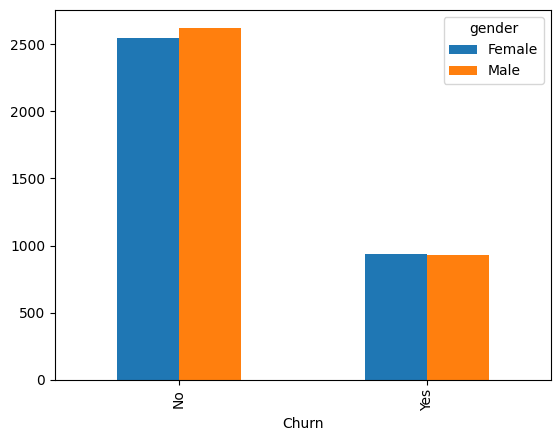

In [162]:
#gráfico distribuição variável gênero por churn


dados.groupby('gender')['Churn'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Churn'>

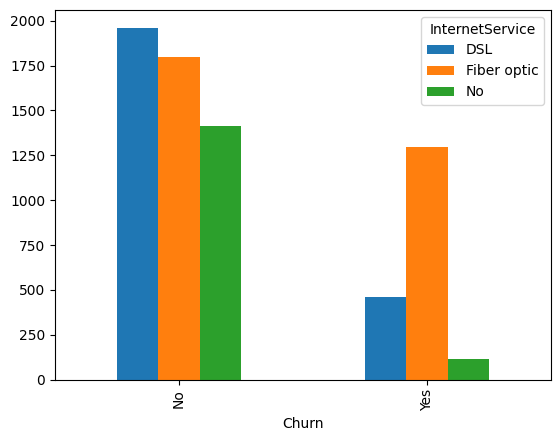

In [163]:
dados.groupby('InternetService')['Churn'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Churn'>

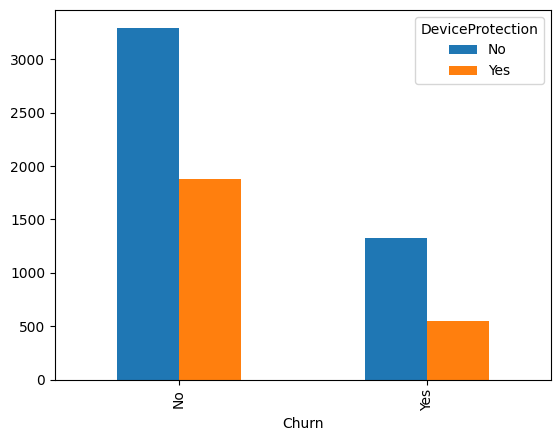

In [164]:
dados.groupby('DeviceProtection')['Churn'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Churn'>

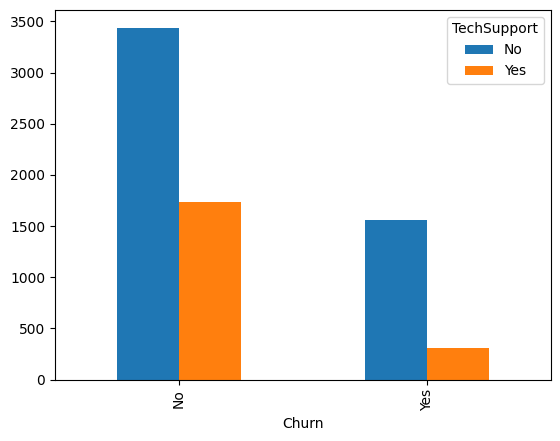

In [165]:
dados.groupby('TechSupport')['Churn'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Churn'>

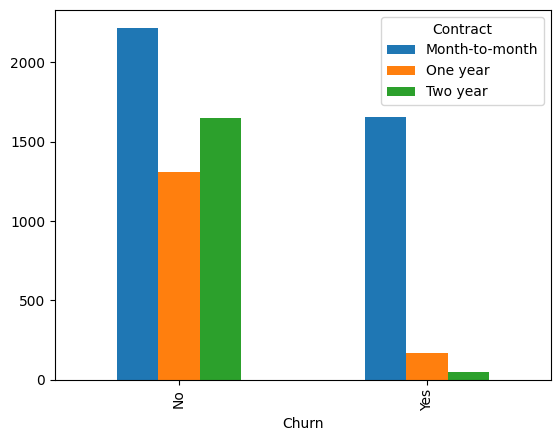

In [166]:
dados.groupby('Contract')['Churn'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Churn'>

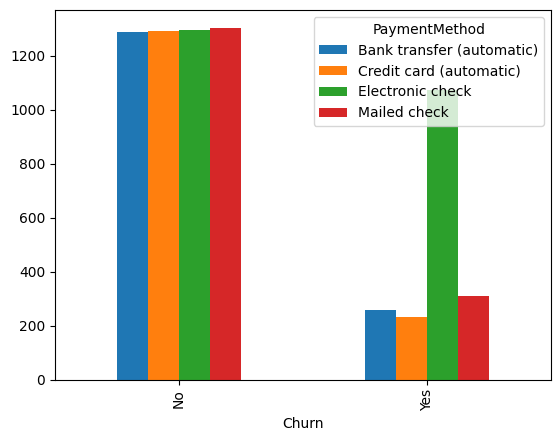

In [167]:
dados.groupby('PaymentMethod')['Churn'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Churn'>

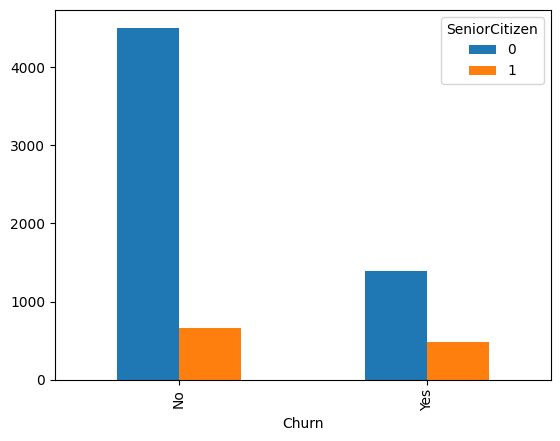

In [168]:
dados.groupby('SeniorCitizen')['Churn'].value_counts().unstack(0).plot.bar()

In [169]:
dados.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


##Transformação das variáveis categóricas para numéricas

As colunas 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' são variáveis categóricas nominais faremos uma transformação nestas variáveis a partir do método   para nosso modelo de aprendizado de máquina conseguir ser aplicado no dataset.

In [170]:
categ = [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]

In [171]:
len(categ)

12

In [172]:
dic ={'Yes': 1, 'No':0, 'Female':1, 'Male':0}

dados_binarios=dados[categ].replace(dic)
dados_binarios.head()

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,1,1,0,0,1,0,1,1,0,1,0
1,0,0,1,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,1,1
3,1,0,1,0,0,1,1,0,1,1,1,1
4,1,0,1,0,0,0,0,1,1,0,1,1


In [99]:
dados_multiclasse = ['InternetService','Contract', 'PaymentMethod' ]

dados_dummies = pd.get_dummies(dados[dados_multiclasse])

In [100]:
dados_numericos = dados[['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'] ]

In [173]:
dados_concatenados = pd.concat([dados_binarios, dados_dummies, dados_numericos], axis =1)
dados_concatenados

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
0,1,1,1,0,0,1,0,1,1,0,...,1,0,0,0,0,1,0,9,65.60,593.30
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,9,59.90,542.40
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,4,73.90,280.85
3,1,0,1,0,0,1,1,0,1,1,...,0,0,0,0,1,0,1,13,98.00,1237.85
4,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,3,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,13,55.15,742.90
7263,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,22,85.10,1873.70
7264,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,2,50.30,92.75
7265,1,1,1,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,67,67.85,4627.65


In [174]:
dados_concatenados.columns

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'],
      dtype='object')

$\bullet$ Falta a normalização dos  dados

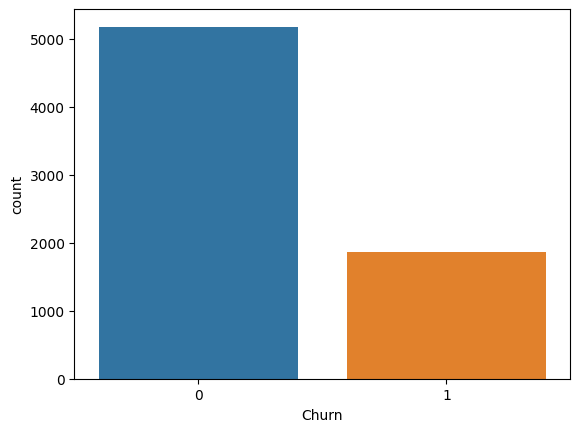

In [175]:
#Verificando se a variável churn está balanceada
ax = sns.countplot(x='Churn', data = dados_concatenados)


In [176]:
#balanceando os dados com a técnica SMOTE

x = dados_concatenados.drop('Churn', axis =1)
y = dados_concatenados['Churn']



In [177]:
smt = SMOTE(random_state =123)
x, y = smt.fit_resample(x,y)

In [178]:
dados_concatenados =pd.concat([x,y], axis =1)
dados_concatenados.head()
dados_concatenados =pd.DataFrame (dados_concatenados)

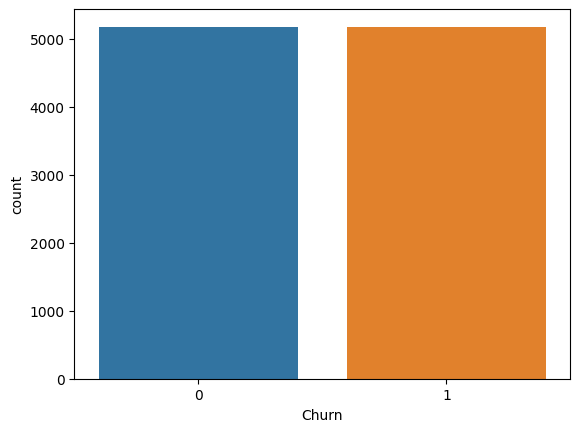

In [179]:
ax = sns.countplot(x='Churn', data = dados_concatenados)

# Modelos de machine learning 🤖

# Regressão Logística

Primeiramente vamos separar a base de treinamento e teste utilizando o scikit learn


In [180]:
type(dados_concatenados)

pandas.core.frame.DataFrame

In [181]:
dados_concatenados_hold_out = dados_concatenados.to_numpy()
ncol = dados_concatenados_hold_out.shape[1]

X = dados_concatenados_hold_out[:, 0:ncol-1]
y = dados_concatenados_hold_out[:,-1]

#Hold Out


In [182]:

p = 0.3
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size = p, random_state = 42)


In [183]:
modelo_LR = LogisticRegression()
modelo_LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Podemos visualizar graficamente as variáveis preditas versus as variáveis de teste

In [184]:
y_predito = modelo_LR.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score
print("A acurácia do modelo de regressão logística é ", accuracy_score(y_test, y_predito)*100)

A acurácia do modelo de regressão logística é  81.28824476650564


# Naïve Bayes

In [186]:
modelo_NB = GaussianNB()
modelo_NB.fit(x_train, y_train)
y_predito = modelo_NB.predict(x_test)

In [187]:
print("A acurácia do modeloc de Naive Bayes", accuracy_score(y_test, y_predito)*100)
print("A acurácia do modeloc de Naive Bayes", mean_absolute_error(y_test, y_predito)*100)

A acurácia do modeloc de Naive Bayes 80.09661835748793
A acurácia do modeloc de Naive Bayes 19.903381642512077


#Árvore de Decisão

In [188]:
modelo_arvore_de_decisao = tree.DecisionTreeClassifier(criterion ='gini', random_state =42)
modelo_arvore_de_decisao.fit(x_train, y_train)
y_predito = modelo_arvore_de_decisao.predict(x_test)

In [189]:
print("A acurácia do modelo de árvore de decisão é ", accuracy_score(y_test, y_predito)*100)

A acurácia do modelo de árvore de decisão é  80.4830917874396


In [190]:
modelo_arvore_entropy=tree.DecisionTreeClassifier(criterion ='entropy', random_state =42)
modelo_arvore_entropy.fit(x_train, y_train)
y_predito = modelo_arvore_entropy.predict(x_test)

In [ ]:
print("A acurácia do modelo de árvore de decisão é ", accuracy_score(y_test, y_predito)*100)

A acurácia do modelo de árvore de decisão é  80.61191626409018


#SVM

#Validação Cruzada Naïve Bayes





In [191]:
dados_concatenados.columns

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Churn'],
      dtype='object')

In [192]:
dados_concatenados.shape

(10348, 26)

In [193]:
#organizando o teste para utilizar o cross validation
Y = dados_concatenados['Churn'][:2070]
X = dados_concatenados[['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']][:2070]



In [131]:
print(-1*cross_val_score(modelo_NB, X, Y, cv =4, scoring ='neg_mean_absolute_error'))

[0.26061776 0.25096525 0.26305609 0.28239845]


#Validação Cruzada Regressão Logística





#Validação Cruzada Árvore de Decisão

In [194]:
print((-1*cross_val_score(modelo_arvore_de_decisao, X, Y, cv =4, scoring ='neg_mean_absolute_error')))

[0.27799228 0.24710425 0.27466151 0.33655706]
